In [2]:
%run Preprocessed_Data.ipynb

In [22]:
# Import the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
plt.style.use('seaborn')

<ipython-input-118-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [8]:
mass.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [9]:
mass.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [10]:
print(calc.shape)
calc_dup = calc[calc.duplicated(
    subset=['patient_id', 'left or right breast', 'image view'], keep=False)]
print(calc_dup.shape)
calc_dup = calc[calc.duplicated(
    subset=['patient_id', 'left or right breast', 'image view', 'abnormality id'], keep=False)]
print(calc_dup.shape)

(1872, 14)
(583, 14)
(0, 14)


In [11]:
print(mass.shape)
mass_dup = mass[mass.duplicated(
    subset=['patient_id', 'left or right breast', 'image view'], keep=False)]
print(mass_dup.shape)
mass_dup = mass[mass.duplicated(
    subset=['patient_id', 'left or right breast', 'image view', 'abnormality id'], keep=False)]
print(mass_dup.shape)

(1696, 14)
(175, 14)
(0, 14)


In [12]:
train_mass.columns

Index(['breast density', 'number of abnormalities', 'mass shape',
       'mass margins', 'overall BI-RADS assessment', 'pathology', 'subtlety'],
      dtype='object')

In [13]:
set(train_calc['number of abnormalities'].tolist())

{1, 2, 3, 4, 5, 6, 7}

In [14]:
set(test_calc['number of abnormalities'].tolist())

{1, 2, 3, 4, 5, 6, 7}

In [15]:
set(train_mass['number of abnormalities'].tolist())

{1, 2, 3, 4, 5, 6}

In [16]:
set(test_mass['number of abnormalities'].tolist())

{1, 2, 3, 4}

In [17]:
ls = [] 

for i in range(1, 8):
    ls.append(train_calc[train_calc['number of abnormalities'] == i]
                .pathology.value_counts())
    
df = pd.DataFrame(ls, index=[i for i in range(1, 8)])
df = df.loc[:, [0, 0.5, 1]]
df

,0.0,0.5,1.0
1,193.0,421.0,380.0
2,101.0,45.0,47.0
3,52.0,10.0,14.0
4,25.0,NaN,4.0
5,15.0,NaN,1.0
6,9.0,NaN,NaN
7,1.0,NaN,NaN


In [18]:
ls = [] 

for i in range(1, 8):
    ls.append(train_calc[train_calc['number of abnormalities'] == i]
                ['overall BI-RADS assessment'].value_counts())
    
df = pd.DataFrame(ls, index=[i for i in range(1, 8)])
df = df.loc[:, sorted(list(df.columns))]
df

,0,2,3,4,5
1,14.0,202.0,48.0,614.0,116.0
2,NaN,100.0,15.0,62.0,16.0
3,NaN,52.0,2.0,17.0,5.0
4,NaN,25.0,NaN,2.0,2.0
5,NaN,15.0,NaN,1.0,NaN
6,NaN,9.0,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN


In [23]:
set(calc["overall BI-RADS assessment"].tolist())

{0, 2, 3, 4, 5}

In [24]:
set(mass["overall BI-RADS assessment"].tolist())

{0, 1, 2, 3, 4, 5}

In [91]:
train_calc.columns

Index(['breast density', 'number of abnormalities', 'calc type',
       'calc distribution', 'overall BI-RADS assessment', 'pathology',
       'subtlety'],
      dtype='object')

In [93]:
set(train_calc[train_calc['overall BI-RADS assessment'] == 1]["breast density"].tolist())

set()

In [96]:
set(mass[mass['overall BI-RADS assessment'] == 1]["pathology"].tolist())

{1.0}

In [97]:
mass[mass['overall BI-RADS assessment'] == 1]["pathology"].value_counts()

1.0    3
Name: pathology, dtype: int64

In [246]:
o_p = pd.DataFrame(calc, columns=["overall BI-RADS assessment", "pathology"])

ls = [] 

for i in range(0, 6):
    ls.append(o_p[o_p['overall BI-RADS assessment'] == i]
                ['pathology'].value_counts())
    
df1 = pd.DataFrame(ls, index=[i for i in range(0, 6)])
df1 = df1.loc[:, sorted(list(df1.columns))]
df1 = df1.fillna(0)

o_p = pd.DataFrame(mass, columns=["overall BI-RADS assessment", "pathology"])

ls = [] 

for i in range(0, 6):
    ls.append(o_p[o_p['overall BI-RADS assessment'] == i]
                ['pathology'].value_counts())
    
df2 = pd.DataFrame(ls, index=[i for i in range(0, 6)])
df2 = df2.loc[:, sorted(list(df2.columns))]
df2 = df2.fillna(0)

df = df1 + df2
df

,0.0,0.5,1.0
0,0.0,179.0,59.0
1,0.0,0.0,3.0
2,593.0,49.0,2.0
3,72.0,303.0,102.0
4,15.0,887.0,731.0
5,2.0,11.0,560.0


In [243]:
ft = df

In [247]:
# remove small samples
for i in df.index:
    row_sum = 0 
    for j in df.columns:
        row_sum += df.iloc[i][j]
    for j in df.columns:
        if df.iloc[i][j] > 100:
            df.iloc[i][j] /= row_sum
        else:
            df.iloc[i][j] = 0

df = df.fillna(0)
# df.columns = ['Benign without Callback', 'Benign', 'Malignant']
ft = df
df

,0.0,0.5,1.0
0,0.000000,0.752101,0.000000
1,0.000000,0.000000,0.000000
2,0.920807,0.000000,0.000000
3,0.000000,0.635220,0.213836
4,0.000000,0.543172,0.447642
5,0.000000,0.000000,0.977312


In [208]:
for i in df.index:
    row_sum = 0 
    for j in df.columns:
        row_sum += df.iloc[i][j]
    for j in df.columns:
        df.iloc[i][j] /= row_sum

df = df.fillna(0)
# df.columns = ['Benign without Callback', 'Benign', 'Malignant']
df

,0.0,0.5,1.0
0,0.000000,0.752101,0.247899
1,0.000000,0.000000,1.000000
2,0.920807,0.076087,0.003106
3,0.150943,0.635220,0.213836
4,0.009186,0.543172,0.447642
5,0.003490,0.019197,0.977312


In [209]:
for i in df.index:
    max_ = 0 
    for j in df.columns:
        if max_ < df.iloc[i][j]:
            max_ = df.iloc[i][j]
    for j in df.columns:
        if max_ != df.iloc[i][j]:
            df.iloc[i][j] = 0
        else:
            df.iloc[i][j] = 1
df

,0.0,0.5,1.0
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0


In [200]:
ft.iloc[0][0.5]

1.0

In [216]:
ft

,0.0,0.5,1.0
0,0.000000,0.752101,0.247899
1,0.000000,0.000000,0.000000
2,0.920807,0.076087,0.000000
3,0.150943,0.635220,0.213836
4,0.009186,0.543172,0.447642
5,0.000000,0.019197,0.977312


In [250]:
f = []
for i, a in enumerate(ft.index):
    for j, b in enumerate(ft.columns):
        if ft.iloc[a][b] != 0:
            f.append(ft.iloc[a][b] * 5000)
f = np.array(f)
f

array([3760.50420168, 4604.03726708, 3176.10062893, 1069.18238994,
       2715.86037967, 2238.21187998, 4886.56195462])

[0, 2, 3, 3, 4, 4, 5]
[0.5, 0.0, 0.5, 1.0, 0.5, 1.0, 1.0]


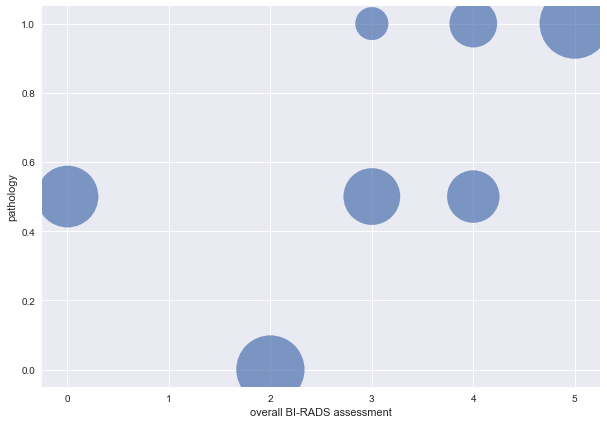

In [251]:
ft = df
# Create arrays for x, y, and sizes
x = []
y = []
for i, a in enumerate(ft.index):
    for j, b in enumerate(ft.columns):
        if ft.iloc[a][b] != 0:
            y.append(ft.columns[j])
            x.append(ft.index[i])
            
print(x)
print(y)

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x, y, s=f, alpha=0.7)

# Set axis labels and title
ax.set_xlabel('overall BI-RADS assessment')
ax.set_ylabel('pathology')
# ax.set_title('Scatter Plot with Size Depending on Frequency')

plt.show()

In [137]:
ft = df

In [138]:
df = pd.DataFrame(calc, columns=["overall BI-RADS assessment", "pathology"])
df.append(pd.DataFrame(mass, columns=["overall BI-RADS assessment", "pathology"]))
df

<ipython-input-138-354385cc3ed8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(pd.DataFrame(mass, columns=["overall BI-RADS assessment", "pathology"]))


,overall BI-RADS assessment,pathology
P_00005_CC_RIGHT_1,3,1.0
P_00005_MLO_RIGHT_1,3,1.0
P_00007_CC_LEFT_1,4,0.5
P_00007_MLO_LEFT_1,4,0.5
P_00008_CC_LEFT_1,2,0.0
...,...,...
P_02464_MLO_RIGHT_1,0,1.0
P_02498_CC_RIGHT_1,0,0.5
P_02498_MLO_RIGHT_1,0,0.5
P_02501_CC_RIGHT_1,0,1.0


In [160]:
type(ft)

pandas.core.frame.DataFrame

In [157]:
freq_table

array([  0.,   0.,   0.,   0.,   0.,  39.,   0.,   0.,   0.,  37.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 534.,   0.,   0.,   0.,
         0.,  18.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,  56.,
         0.,   0.,   0.,  53.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   3.,   0.,   0.,   0.,   0., 543.,   0.,   0.,
         0., 385.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
       197.])

In [163]:
ft.index 

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

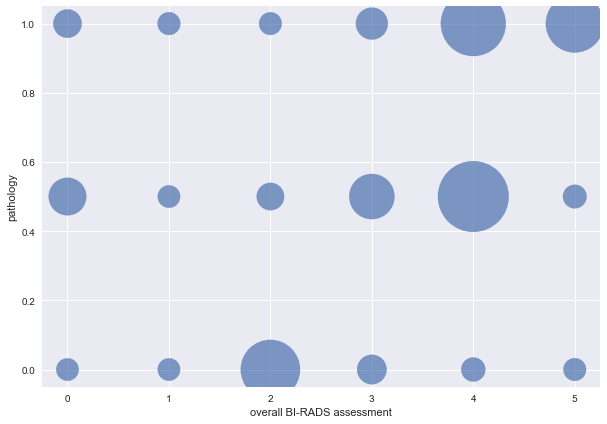

In [175]:
# Create arrays for x, y, and sizes
x = []
y = []
sizes = []
for i in range(len(ft.index)):
    for j in range(len(ft.columns)):
        y.append(ft.columns[j])
        x.append(ft.index[i])
        sizes.append(ft.iloc[i, j])

# Normalize sizes to a range of 50-500
sizes = np.array(sizes)
sizes = 50 + (sizes - sizes.min()) / (sizes.max() - sizes.min()) * 450
sizes *= 10
# colors = sizes / 10

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x, y, s=sizes, alpha=0.7)
# ax.scatter(x, y, s=sizes, c=colors, alpha=0.7)

# Set axis labels and title
ax.set_xlabel('overall BI-RADS assessment')
ax.set_ylabel('pathology')
# ax.set_title('Scatter Plot with Size Depending on Frequency')

plt.show()

In [162]:
# Create a contingency table
ct = pd.crosstab(df['BI-RADS'], df['Pathology'])

# Visualize the contingency table using a heatmap
sns.heatmap(ct, annot=True, cmap='Blues')

KeyError: 'BI-RADS'

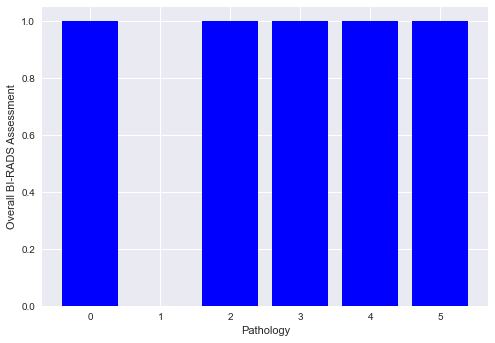

In [133]:
plt.bar(df['overall BI-RADS assessment'], df['pathology'], color='blue')
plt.ylabel('Overall BI-RADS Assessment')
plt.xlabel('Pathology')
plt.show()

In [3]:
set(calc['overall BI-RADS assessment'].tolist())

{0, 2, 3, 4, 5}

In [4]:
set(mass['overall BI-RADS assessment'].tolist())

{0, 1, 2, 3, 4, 5}